In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

plotly = False

In [2]:
data = pd.read_csv('APPL.csv',parse_dates=True, index_col=0)
series = data.Close
series.tail()

Date
2018-03-04    176.21
2018-03-11    179.98
2018-03-18    178.02
2018-03-25    164.94
2018-04-01    168.34
Name: Close, dtype: float64

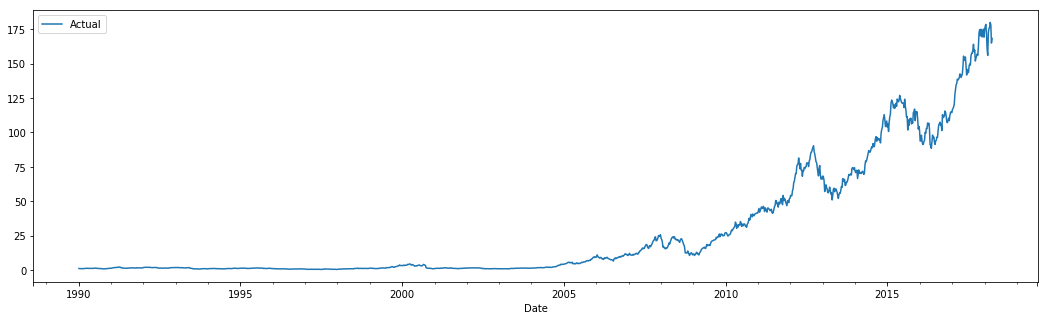

In [3]:
plt.figure(figsize=(18,5))
series.plot(label="Actual",legend=True)

In [4]:
import math
last = data.shape[0]-math.ceil(.2*(data.shape[0]))

### ACF and PACF
autocorrelation and partial autocorrelation

**AutoCorrelation** : AutoCorrelation also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them.

**Partial AutoCorrelation** : The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

PACF helps in finding out order of AR process.

For AR(1), PACF have significant value for only 1 lag

For AR(2), PACF have significant value for 2 lags

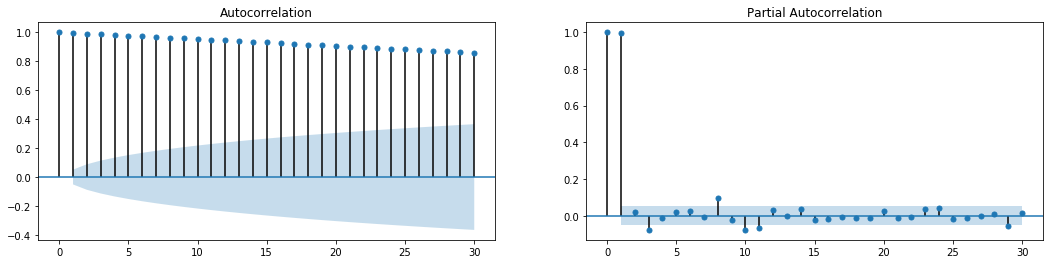

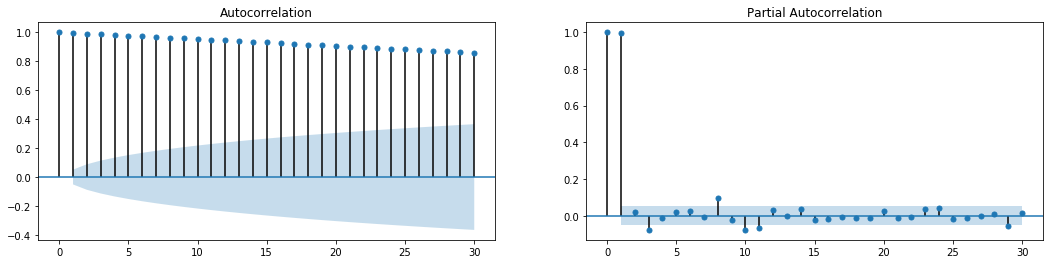

In [5]:
import statsmodels.tsa.api as smt
fig,ax = plt.subplots(figsize=(18,4),ncols=2,nrows=1)
smt.graphics.plot_acf(series, lags=30,ax=ax[0], alpha=0.05)
smt.graphics.plot_pacf(series, lags=30, ax=ax[1], alpha=0.05)

In [6]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(series[:last],order=(2,1,2),dates=series.index[:last],freq='W')
arima_model = arima.fit(method='css-mle')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1178
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1383.676
Method:                       css-mle   S.D. of innovations              0.783
Date:                Wed, 08 May 2019   AIC                           2779.351
Time:                        00:27:42   BIC                           2809.781
Sample:                    01-14-1990   HQIC                          2790.824
                         - 08-05-2012                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0659      0.027      2.448      0.015       0.013       0.119
ar.L1.D.Close     0.7477      0.128      5.829      0.000       0.496       0.999
ar.L2.D.Close    -0.1542      0.115     

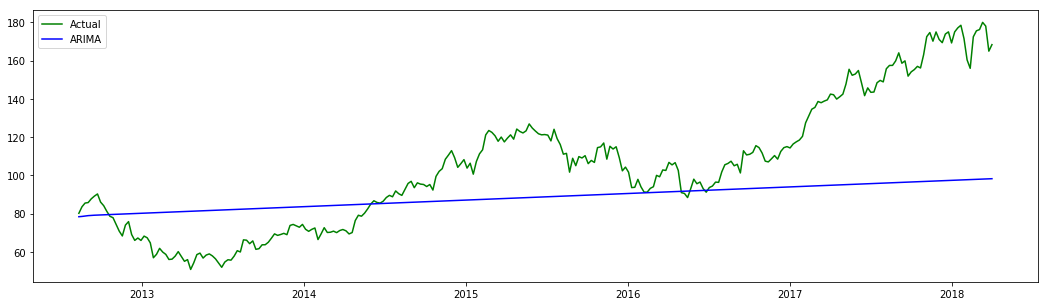

In [7]:
org = series[last:]
pred = arima_model.forecast(steps=len(series[last:]))[0]
if plotly:
    original = go.Scatter( x = org.index, y = org, name = "Actual", line=dict( color='green'))
    predicted = go.Scatter( x = pred.index, y = pred, name = "ARIMA", line=dict( color='blue'))
    plots = [original,predicted]
    py.iplot(plots, filename='our predictions')
else:
    plt.figure(figsize=(18,5))
    plt.plot(org.index,org,'g',label="Actual",)
    plt.plot(org.index,pred,'b',label="ARIMA")
    plt.legend()

In [8]:
from sklearn.metrics import mean_absolute_error,r2_score
print("Mean Absolute Error :{}".format(mean_absolute_error(pred,org)))
print("R Square : {}".format(r2_score(pred,org)))

Mean Absolute Error :25.182002410722504
R Square : -32.62095978439086
